# Рынок заведений общественного питания Москвы

Решено небольшое кафе в Москве. Оно оригинальное — гостей должны обслуживать роботы. Проект многообещающий, но дорогой. Вместе с партнёрами нужно обратиться к инвесторам. Их интересует текущее положение дел на рынке — можно снискать популярность на долгое время, когда все зеваки насмотрятся на роботов-официантов?

Есть открытые данные о заведениях общественного питания в Москве.

**Описание данных**

Таблица rest_data:
- id — идентификатор объекта;
- object_name — название объекта общественного питания;
- chain — сетевой ресторан;
- object_type — тип объекта общественного питания;
- address — адрес;
- number — количество посадочных мест.

## Выгрузка библиотек, данных и подготовка их к анализу.

- Загрузить данные о заведениях общественного питания Москвы.
- Убедиться, что тип данных в каждой колонке — правильный, а также отсутствуют пропущенные значения и дубликаты.
- При необходимости обработать их.

In [1]:
#импортируем все необходимые нам библтотеки
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
#читаем файлы и присваиваем переменные
rest_data = pd.read_csv('/datasets/rest_data.csv')

In [3]:
#изучим подробно
rest_data.sample(5)

,id,object_name,chain,object_type,address,number
1202,154625,"ВЫПЕЧКА, КОФЕ",нет,предприятие быстрого обслуживания,"город Москва, улица Дмитрия Ульянова, дом 16, ...",10
4090,88742,Кафе,нет,кафе,"город Москва, улица Генерала Белова, дом 35",12
6119,25516,Ресторан «БОНИ МАРИЯ»,нет,ресторан,"город Москва, 42-й километр Московской Кольцев...",170
5564,27505,ДОГОТОВОЧНАЯ СТОЛОВАЯ - ШКОЛА 1914,нет,столовая,"город Москва, Суздальская улица, дом 12Б",240
11112,179591,Шаурма,нет,предприятие быстрого обслуживания,"город Москва, Череповецкая улица, дом 12А",0


In [4]:
rest_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
id             15366 non-null int64
object_name    15366 non-null object
chain          15366 non-null object
object_type    15366 non-null object
address        15366 non-null object
number         15366 non-null int64
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


In [5]:
#приведем значения наименования и адреса к нижнему регистру
rest_data['object_name'] = rest_data['object_name'].str.lower()
rest_data['address'] = rest_data['address'].str.lower()


In [6]:
#проверим на дубли
rest_data.duplicated().sum()

0

In [7]:
#попробуем найти скрытые дубли. Вдруг названия написаны по разному, но тогда остальные
#параметры должны совпадать. сгруппируем по ним
rest_data.groupby(['object_name', 'address']).agg({'id':'nunique'}).\
sort_values(by = 'id',ascending = False).reset_index().head(10)

,object_name,address,id
0,комбинат питания мгту им.н.э.баумана,"город москва, 2-я бауманская улица, дом 5, стр...",11
1,лиор,"город москва, шарикоподшипниковская улица, дом...",9
2,кафе,"город москва, 1-я останкинская улица, дом 55",9
3,lift,"город москва, багратионовский проезд, дом 7, к...",7
4,кафе,"город москва, тихорецкий бульвар, владение 1, ...",6
5,закусочная,"город москва, люблинская улица, дом 112, строе...",5
6,кафе,"город москва, люблинская улица, дом 112, строе...",5
7,кафе,"город москва, береговой проезд, дом 5а, корпус 1",5
8,павильон «кукуруза»,"город москва, люблинская улица, дом 153",5
9,lift,"город москва, багратионовский проезд, дом 7, к...",5


In [8]:
rest_data[(rest_data['object_name'] == 'комбинат питания мгту им.н.э.баумана')]
          

,id,object_name,chain,object_type,address,number
113,28608,комбинат питания мгту им.н.э.баумана,нет,буфет,"город москва, бригадирский переулок, дом 3-5",34
114,28613,комбинат питания мгту им.н.э.баумана,нет,закусочная,"город москва, бригадирский переулок, дом 3-5",216
115,28614,комбинат питания мгту им.н.э.баумана,нет,буфет,"город москва, бригадирский переулок, дом 3-5",12
2374,28603,комбинат питания мгту им.н.э.баумана,нет,столовая,"город москва, 2-я бауманская улица, дом 5, стр...",100
2375,28604,комбинат питания мгту им.н.э.баумана,нет,столовая,"город москва, 2-я бауманская улица, дом 5, стр...",150
2376,28605,комбинат питания мгту им.н.э.баумана,нет,кафетерий,"город москва, 2-я бауманская улица, дом 5, стр...",35
2377,28606,комбинат питания мгту им.н.э.баумана,нет,буфет,"город москва, 2-я бауманская улица, дом 5, стр...",16
2378,28607,комбинат питания мгту им.н.э.баумана,нет,закусочная,"город москва, 2-я бауманская улица, дом 5, стр...",16
2379,28609,комбинат питания мгту им.н.э.баумана,нет,буфет,"город москва, 2-я бауманская улица, дом 5, стр...",30
2380,28610,комбинат питания мгту им.н.э.баумана,нет,столовая,"город москва, 2-я бауманская улица, дом 5, стр...",200


In [9]:
# Пример:

duplicated_objects = rest_data.duplicated(subset = ['object_name', 'chain', 'object_type', 'address']).sum()
print(f'Количество возможных дубликатов: {duplicated_objects}')

Количество возможных дубликатов: 183


**Вывод**

При обработке и выгрузке общей информации мы видим, что данные качественные, нет пропусков, все типы данных в нужном формате. Дубликатов также нет. Для удобства привела наименование и адрес к нижнему регистру. 

## Анализ данных

- Исследовать соотношение видов объектов общественного питания по количеству. Построить график.
- Исследовать соотношение сетевых и несетевых заведений по количеству. Построить график.
- Для какого вида объекта общественного питания характерно сетевое распространение?
- Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?
- Для каждого вида объекта общественного питания описать среднее количество посадочных мест. Какой вид предоставляет в среднем самое большое количество посадочных мест? Построить графики.
- Выделить в отдельный столбец информацию об улице из столбца address .
- Построить график топ-10 улиц по количеству объектов общественного питания. Ответьте на вопрос с помощью внешней информации — в каких районах Москвы находятся эти улицы?
- Найти число улиц с одним объектом общественного питания.в каких районах Москвы находятся эти улицы?
- Посмотреть на распределение количества посадочных мест для улиц с большим количеством объектов общественного питания. Какие закономерности можно выявить?

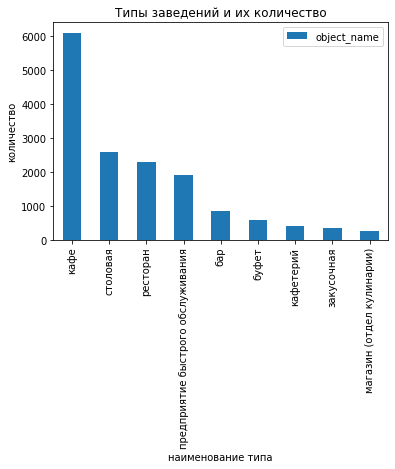

In [10]:
#получим уникальные значения типов и посчитаем их количество, построим диаграмму
rest_data.groupby('object_type')['object_name'].count().sort_values(ascending = False).plot(kind= 'bar')
plt.title('Типы заведений и их количество')
plt.legend()
plt.xlabel("наименование типа")
plt.ylabel("количество")
plt.show();

Больше всего в Москве кафе, причем порядка 40%, столовые, рестораны и быстрое питание распределились примерно одинаково. Баров, буфетов, закусочных и кафетериев значительно меньше.

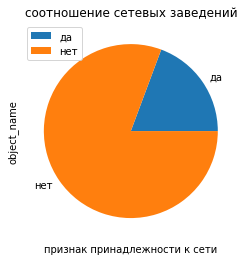

In [11]:
#построим график по признаку сетевого или нет заведений
rest_data.groupby('chain')['object_name'].count().plot(kind= 'pie')
plt.title('соотношение сетевых заведений')
plt.legend()
plt.xlabel("признак принадлежности к сети")
plt.show();

Как мы видим, несетевых заведений намного больше, чем сетевых.

In [12]:
#выясним, для какого типа общепита характерно сетевое распространение
(rest_data[rest_data['chain'] == 'да'].groupby('object_type')['object_name'].\
count()/rest_data.groupby('object_type')['object_name']\
.count()* 100).sort_values(ascending = False).round(2)

object_type
предприятие быстрого обслуживания    41.13
магазин (отдел кулинарии)            28.57
ресторан                             23.81
кафе                                 22.89
закусочная                           15.56
кафетерий                            13.07
бар                                   4.32
буфет                                 1.88
столовая                              0.12
Name: object_name, dtype: float64

В большей части, фаст фуд представлен сетевыми заведениями. Также отдел кулинарии, кафе и рестораны. Столовые, буфеты и бары в большей части не сетевые заведения

In [13]:
#проверим, чего больше в сетевых, заведений с большим количеством мест или нет
rest_data[rest_data['chain'] == 'да']['number'].describe()

count    2968.000000
mean       52.919811
std        57.140644
min         0.000000
25%        15.000000
50%        40.000000
75%        72.000000
max       580.000000
Name: number, dtype: float64

Больше заведений с меньшим количеством посадочных мест.

In [14]:
n = rest_data.groupby('object_type')['number'].mean().sort_values(ascending = False).reset_index()
n.columns = ['object_type', 'number']


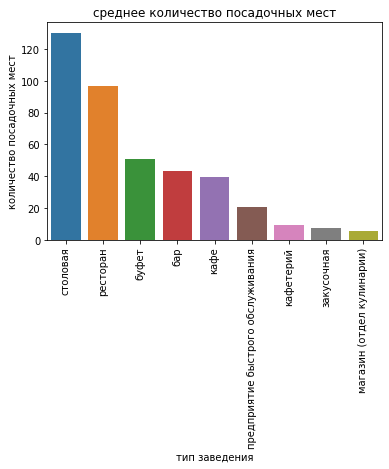

In [15]:
sns.barplot(x='object_type', y='number', data=n) 
plt.xticks(rotation=90)
plt.title('среднее количество посадочных мест')
plt.xlabel("тип заведения")
plt.ylabel("количество посадочных мест")
plt.show();

Больше всего посадочных мест характерно для столовых - думаю, тут все понятно, это принцип работы столовых, большой поток, минимум времени, основная масса в обеды. Далее позицию занимают рестораны, что в целом тоже ясно - они как минимум имеют залы для проведения торжеств с большим количеством мест. Буфеты, бары имет примерно одинаковое количество мест - в барах обычно большую прощадь занимают танцполы, место для концертов. Буфеты сами по себе редко имеют ольшую площадь. Маленькое количство в кафе обусловлено тем, что самих кафе у нас много в выборке и значения просто усреднились. Также для сохранения уюта и быстрого обслуживания. Кафетерий и магазин с закусочной имеют до 20 мест.

In [16]:
#выделим в отдельный столбец улицу
streets = rest_data['address'].to_list()
streets_1= []
for i in streets:  
    start = i.find('город москва')
    end = i.find('дом')
    streets_1.append(i[start+14:end-2])
rest_data['streets'] = streets_1
rest_data.sample(5)

,id,object_name,chain,object_type,address,number,streets
7445,69864,ресторан «бакинский бульвар»,да,ресторан,"город москва, 19-й километр московской кольцев...",98,"19-й километр московской кольцевой автодороги,..."
3424,19712,кафе «михайло»,нет,кафе,"город москва, проспект вернадского, дом 86, ст...",50,проспект вернадского
1910,128874,пивная телега,нет,кафе,"город москва, город зеленоград, заводская улиц...",20,"город зеленоград, заводская улица"
6455,20192,кафе «кофейня старбакс»,да,кафе,"город москва, улица мичуринский проспект, олим...",60,"улица мичуринский проспект, олимпийская деревня"
5265,140621,мангалбар,нет,предприятие быстрого обслуживания,"город москва, улица лётчика бабушкина, владени...",25,"улица лётчика бабушкина, владение"


In [17]:
rest_data['streets'].isnull().sum()

0

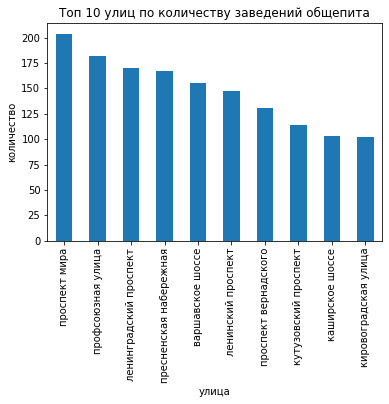

In [18]:
#выделим топ10 улиц по количеству общепита
rest_data.groupby('streets')['object_name'].count().sort_values(ascending = False).head(10).plot(kind='bar')
plt.title('Топ 10 улиц по количеству заведений общепита')
plt.xlabel("улица")
plt.ylabel("количество")
plt.show();

Все заведения сосредоточены в центре города, около Красной площади - самые туристические места и самые посещаемые. В центре соссредоточена основная масса людей, и, как следствие, больше заведений. А также существенно влият протяженность улиц - тот же проспект Мира захватывает аж несколько районов! Значит, вероятность количества расположенных зданий тоже растет.

Воспользуемся внешней информацией и подгрузим районы этих улиц
- Проспект Мира: Мещанский, Марьина Роща, Алексеевский, Останкинский, Свиблово, Ростокино
- Профсоюзная улица: Академический, Коньково, Обручевский, Тёплый Стан, Черёмушки, Ясенево
- Ленинградский проспект: Беговой, Аэропорт, Сокол, Хорошёвский
- Пресненская набережная: Пресненский
- Варшавское шоссе: Донской, Нагатино-Садовники, Нагорный
- Ленинский проспект: Гагаринский и Донской
- Проспект Вернадского: Проспект Вернадского
- Кутузовский проспект: Дорогомилово, Фили-Давыдково
- Каширское шоссе: Нагатино-Садовники и Нагорный
- Ходынский бульвар: Хорошёвский

In [19]:
query = rest_data.groupby('streets')['object_name'].count().reset_index()
query.columns = ['streets', 'count']
query[query['count']==1].sample(5)


,streets,count
222,56-й километр московской кольцевой автодороги,1
328,библиотечная улица,1
2140,хвалынский бульвар,1
336,богоявленский переулок,1
240,8-й проезд марьиной рощи,1


In [20]:
query[query['count']==1].sum()

streets     42-й километр калужского шоссе проезд n 5231-...
count                                                    795
dtype: object

799 улиц с одним объектом общественного питания. 

In [21]:
from io import BytesIO
import requests
spreadsheet_id = '1edFVUeqhJZtXITOeu5iY396ki34aRsp7XSSfZVe7k7w'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
df = pd.read_csv(BytesIO(r.content))
df

,streetname,areaid,okrug,area
0,Выставочный переулок,17,ЦАО,Пресненский район
1,улица Гашека,17,ЦАО,Пресненский район
2,Большая Никитская улица,17,ЦАО,Пресненский район
3,Глубокий переулок,17,ЦАО,Пресненский район
4,Большой Гнездниковский переулок,17,ЦАО,Пресненский район
...,...,...,...,...
4393,Вознесенский проезд,17,ЦАО,Пресненский район
4394,Волков переулок,17,ЦАО,Пресненский район
4395,Поварская улица,17,ЦАО,Пресненский район
4396,Кудринская площадь,17,ЦАО,Пресненский район


In [22]:
df['streetname'] = df['streetname'].str.lower()
df = df.rename(columns={'streetname':'streets'})

In [23]:
query= query.merge(df,on ='streets')
query = query[query['count']==1]
query.head(10)

,streets,count,areaid,okrug,area
2,1-й балтийский переулок,1,54,САО,Район Аэропорт
3,1-й басманный переулок,1,13,ЦАО,Басманный район
4,1-й басманный переулок,1,15,ЦАО,Красносельский район
5,1-й ботанический проезд,1,82,СВАО,Район Свиблово
8,1-й вешняковский проезд,1,120,ЮВАО,Рязанский район
10,1-й голутвинский переулок,1,21,ЦАО,Район Якиманка
14,1-й зачатьевский переулок,1,20,ЦАО,Район Хамовники
16,1-й кирпичный переулок,1,36,ВАО,Район Соколиная Гора
17,1-й кожевнический переулок,1,98,ЮАО,Даниловский район
18,1-й кожуховский проезд,1,98,ЮАО,Даниловский район


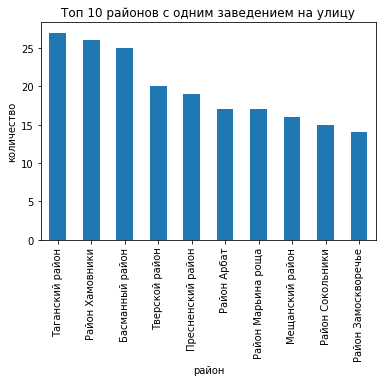

In [24]:
query.groupby('area')['streets'].count().sort_values(ascending=False).head(10).plot(kind = 'bar')
plt.title('Топ 10 районов с одним заведением на улицу')
plt.xlabel("район")
plt.ylabel("количество")
plt.show();

In [25]:
top = rest_data.groupby('streets').agg({'object_name': 'count', 'number':'mean'})\
.sort_values(by = 'object_name',ascending=False).head(10).reset_index()
top.columns = ['streets', 'object_name', 'number']
top


,streets,object_name,number
0,проспект мира,204,62.696078
1,профсоюзная улица,182,46.412088
2,ленинградский проспект,170,52.941176
3,пресненская набережная,167,45.844311
4,варшавское шоссе,155,53.967742
5,ленинский проспект,147,63.469388
6,проспект вернадского,131,66.061069
7,кутузовский проспект,114,85.061404
8,каширское шоссе,103,59.038835
9,ходынский бульвар,102,18.950980


Интересно, но районы с малым количеством заведений находятся в центре также. Возможно, это связано с тем, что в этих районах короткие улицы и их много.

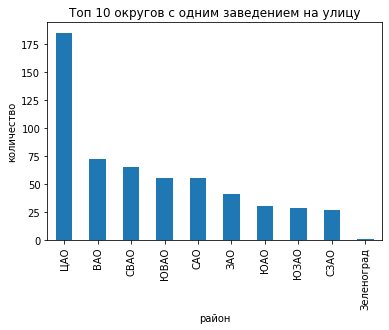

In [26]:
# Пример

query.groupby('okrug')['streets'].count().sort_values(ascending=False).head(10).plot(kind = 'bar')
plt.title('Топ 10 округов с одним заведением на улицу')
plt.xlabel("район")
plt.ylabel("количество")
plt.show();

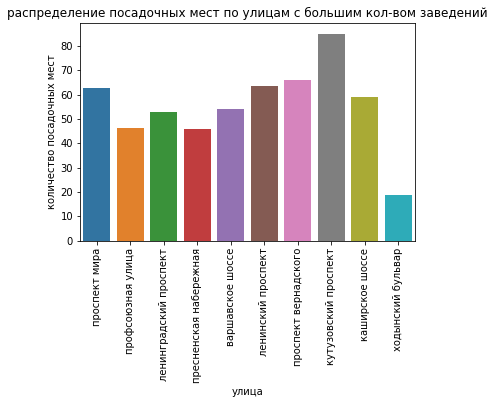

In [27]:
sns.barplot(x='streets', y='number', data=top) 
plt.xticks(rotation=90)
plt.title('распределение посадочных мест по улицам с большим кол-вом заведений')
plt.xlabel("улица")
plt.ylabel("количество посадочных мест")
plt.show();

В среднем все заведения имеют одинаковое количество посадочных мест и при этом не так много - это обусловдено стоимостью аренды, плюс думаю, что в целом из-за насыщенности общепитом выделяются не такие большие площади. 

# Вывод
В Москве больше несетевых заведений, большинство из которых кафе, столовые, рестораны. Представителями сетевых заведений являются кафе быстрого питания . Основная масса общественного питания сосредоточена в центре города, за пределами МКАДа и в области нет такой насыщенности. Большое количество посадочных мест не актуально для столицы - в среднем заведения вмещают в себя до 80 человек.

Презентация: https://disk.yandex.ru/i/osPPNHIkG6LTkQ